### Homework 2, Solution

Finish the last tasks from the class 2 notebook that we did not get to
    

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy import random 
random.seed(42)
pd.set_option('precision', 3)
print(pd.Series(np.pi))

0    3.142
dtype: float64


### Hacker Statistic

The ability to draw new samples from a population with a known mean is a luxury that we usually do not have. Is there any way to "fake" new samples using just the one "lousy" sample we have at hand ? 
This might sound like an impossible feat analogously to "pulling yourself up by your own **bootstraps**"!
But that is exactly what we will try now:


Tasks

1. ..
2. ..
3. ..
4. ..
5. Write a function that computes *bootstrap replicates* of the mean from a sample.
6. Generalize this function to accept any summary statistic, not just the mean.

In [ ]:
#Write a function that computes bootstrap replicates of the mean from a sample.
def bootstrap_replicate_1d(data):
    return np.mean(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data)

    return bs_replicates


In [1]:
#Generalize this function to accept any summary statistic, not just the mean.
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


#### Bootstrap replicates of other statistics

The mean is just one of many sample summaries that we might be interested in. 
Recall the Auto data, in particular the boxplot of mpg ~ cylinders. The graph suggested that not only does the mean mpg seems too decrease with number of cylinders but also the variance.
Let us get **confidence intervals** of the stdev for cyl = 4 and compare to cyl=6. 

**Tasks**
- Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
- Argue intuitively whether the stdevs are clearly different.

In [13]:
df = pd.read_csv('../data/Auto.csv')
#df["mpg"].head


In [20]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [18]:
#Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
sdbs4 = draw_bs_reps(df[df["cylinders"]==4].mpg, np.std, size=1000)
sdbs6 = draw_bs_reps(df[df["cylinders"]==6].mpg, np.std, size=1000)

In [36]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [34]:
def plot2ECDFs(x1, x2,leg=('male', 'female'),xlab='birth weight(g)',ylab='ECDF',title=''):
    # Compute ECDF for sample size 40: m_40, f_40
    mx_40, my_40 = ecdf(x1)
    fx_40, fy_40 = ecdf(x2)

    # Plot all ECDFs on the same plot
    _ = plt.plot(mx_40, my_40, marker = '.', linestyle = 'none')
    _ = plt.plot(fx_40, fy_40, marker = '.', linestyle = 'none')

    # Make nice margins
    plt.margins(0.02)

    # Annotate the plot
    plt.legend(leg, loc='lower right')
    _ = plt.xlabel(xlab)
    _ = plt.ylabel(ylab)
    _ = plt.title(title)

    # Display the plot
    plt.grid()
    plt.show()

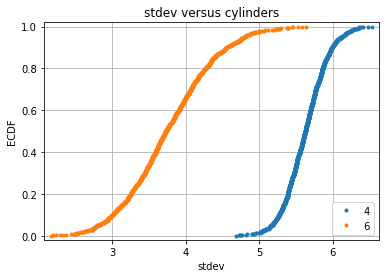

In [37]:
plot2ECDFs(sdbs4,sdbs6,leg=('4', '6'),xlab='stdev', title="stdev versus cylinders")

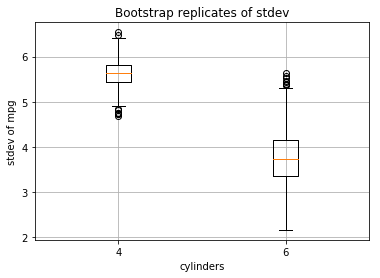

In [25]:
#plt.hist(sdbs4,25)
plt.boxplot([sdbs4,sdbs6])
plt.title("Bootstrap replicates of stdev")
plt.ylabel("stdev of mpg")
plt.xlabel("cylinders")
plt.xticks([1, 2], ['4', '6'])
plt.grid()
plt.show()

In [40]:
%precision 2
[np.percentile(sdbs4,5), np.percentile(sdbs6,95) ]

[5.16, 4.80]

In [43]:
np.percentile(sdbs6,(2.5,97.5))

array([2.67, 4.99])

In [44]:
np.percentile(sdbs4,(2.5,97.5))

array([5.06, 6.22])

In [45]:
tmp = draw_bs_reps(df[df["cylinders"]==4].mpg, np.mean, size=1000)

In [51]:
np.percentile(tmp,(0.01,1, 2.5,95,97.5))

array([28.11, 28.39, 28.52, 29.93, 30.1 ])

In [50]:
min(tmp)

28.10